<a href="https://colab.research.google.com/github/Santosh0236/HandwrittenDigitsClassification/blob/master/HandwrittenDigitsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program uses CNN to classify handwritten digits 
#              as number 0-9

In [1]:
# import libraries 
%tensorflow_version 1.x 
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist 
from keras.utils import to_categorical, np_utils
# import mnist #Get data set from 
import matplotlib.pyplot as plt 
import numpy as np 

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
# Load the data and split it into train and test sets 
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
# Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Take a look at the first image (at index= 0) in the training dataset
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# print the image label
y_train[0]

5

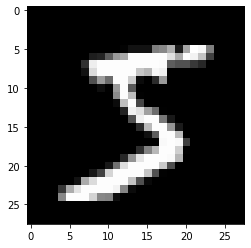

In [6]:
#Show the image as picture 
plt.imshow(X_train[0],cmap='gray')

In [0]:
#Reshapr the data to fit the model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
# One-hot Encoding :
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#Build the CNN model
model = Sequential()
model.add(Conv2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [10]:
# Compile the model 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Train The model
hist = model.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot), epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 176s 3ms/step - loss: 1.2981 - acc: 0.8864 - val_loss: 0.0814 - val_acc: 0.9733
Epoch 2/3
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0671 - acc: 0.9796 - val_loss: 0.0797 - val_acc: 0.9756
Epoch 3/3
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0459 - acc: 0.9855 - val_loss: 0.0770 - val_acc: 0.9793


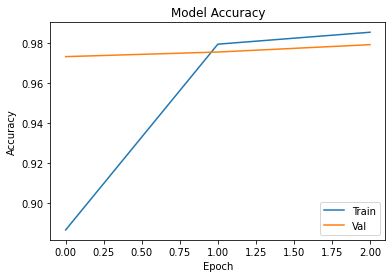

In [13]:
# Visualize the models accuracy 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'best')
plt.show()

In [14]:
# Show predictions as probabilities  for the first 4 
# images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[4.6860194e-07, 2.8847294e-13, 7.2377099e-10, 2.2020008e-06,
        4.9528833e-13, 6.8741718e-12, 2.5805198e-16, 9.9999702e-01,
        3.4570917e-08, 2.7127973e-07],
       [1.6207425e-06, 6.8053612e-09, 9.9999821e-01, 1.5056933e-09,
        1.0320571e-14, 4.3703715e-15, 1.3254854e-07, 2.0469303e-15,
        1.1354779e-09, 5.9317904e-13],
       [6.6502264e-04, 9.8668087e-01, 1.1824213e-04, 2.7959111e-08,
        3.3733796e-04, 5.7449157e-05, 1.5490141e-05, 8.4768308e-06,
        1.2116750e-02, 4.2946544e-07],
       [9.9999976e-01, 1.7762151e-13, 4.1920281e-09, 2.1052320e-13,
        7.7141508e-11, 4.2387414e-09, 2.7048637e-07, 2.6501417e-11,
        9.1994946e-11, 6.9648429e-09]], dtype=float32)

In [16]:
# print our predictions as number labels for the first 4 images
print('Predicted value is : ')
print(np.argmax(predictions,axis=1))
#print the actual labels 
print('Label is : ')
print(y_test[:4])

Predicted value is : 
[7 2 1 0]
Label is : 
[7 2 1 0]


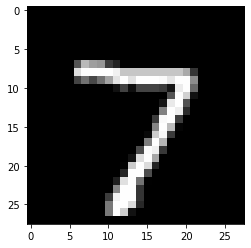

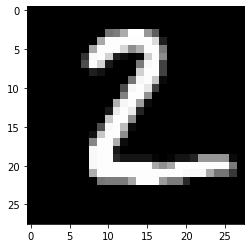

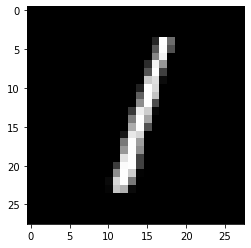

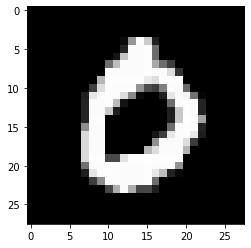

In [18]:
# Show the first 4 images as pictures 
for i in range(0,4):
  image = X_test[i]
  image= np.array(image,dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow (pixels, cmap='gray')
  plt.show()